In [37]:
%pip install pycaret[full]

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pycaret[full] from https://files.pythonhosted.org/packages/eb/43/ec8d59a663e0a1a67196b404ec38ccb0051708bad74a48c80d96c61dd0e5/pycaret-3.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for lightgbm>=3.0.0 from https://files.pythonhosted.org/packages/74/02/5ad29a2a3d193a87d5a05fb7fd3b4e30b8eb6db7a9ddbe193beb7053978f/lightgbm-4.2.0-py3-none-win_amd64.whl.metadata
     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     - -------------------------------------- 0.2/7.2 MB 6.9 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/7.2 MB 7.2 MB/s eta 0:00:01
     ------- -------------------------------- 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [55]:
from pycaret.classification import *
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd

In [3]:
df = pd.read_csv("./creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [36]:
# Check if dataset has any NaN
df.isnull().any().any()

False

In [11]:
# Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [17]:
2 * 24 * 60 * 60 # 2 days of data in seconds

172800

In [14]:
# Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [29]:
# Test size of 8 hours, remaining for training
test_hours = 8
train_hours = 48 - test_hours
train_delta = train_hours * 60 * 60 # Convert to seconds
train_df = df[(df['Time'] >= 0) & (df['Time'] < train_delta)]
test_df = df[df['Time'] >= train_delta]

In [30]:
train_df['Class'].value_counts()

Class
0    224450
1       415
Name: count, dtype: int64

In [31]:
test_df['Class'].value_counts()

Class
0    59865
1       77
Name: count, dtype: int64

In [46]:
cc = setup(data=train_df, target='Class', session_id=42,
           train_size=0.8, # training over 80% of available data
           transformation=True, # transformation changes the shape of the distribution such that the transformed data can be represented by normal distribution
           normalize=True, # rescale the values of numeric columns
           ignore_features=['Time'],
           remove_multicollinearity=True, # drop one of the two features that are highly correlated with each other
           normalize_method='robust',
           feature_selection=True)

[LightGBM] [Info] Number of positive: 332, number of negative: 179560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 179892, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001846 -> initscore=-6.293130
[LightGBM] [Info] Start training from score -6.293130


,Description,Value
0,Session id,42
1,Target,Class
2,Target type,Binary
3,Original data shape,"(224865, 31)"
4,Transformed data shape,"(224865, 6)"
5,Transformed train set shape,"(179892, 6)"
6,Transformed test set shape,"(44973, 6)"
7,Ignore features,1
8,Numeric features,29
9,Preprocess,True


In [47]:
best_baseline_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9994,0.9383,0.7711,0.8978,0.8286,0.8283,0.8312,3.8490
et,Extra Trees Classifier,0.9994,0.9441,0.7529,0.9290,0.8306,0.8303,0.8355,1.4610
knn,K Neighbors Classifier,0.9993,0.9214,0.7470,0.8804,0.8066,0.8063,0.8098,1.2850
catboost,CatBoost Classifier,0.9993,0.9579,0.7406,0.8531,0.7906,0.7902,0.7934,6.3410
ada,Ada Boost Classifier,0.9991,0.9617,0.6537,0.8273,0.7282,0.7278,0.7339,1.9090
lr,Logistic Regression,0.9990,0.9656,0.5930,0.8418,0.6909,0.6904,0.7035,2.1570
dt,Decision Tree Classifier,0.9990,0.8671,0.7347,0.7490,0.7394,0.7389,0.7402,1.0590
svm,SVM - Linear Kernel,0.9990,0.0000,0.5537,0.8396,0.6622,0.6618,0.6787,0.9450
lda,Linear Discriminant Analysis,0.9990,0.9474,0.7045,0.7539,0.7237,0.7232,0.7260,0.9510
gbc,Gradient Boosting Classifier,0.9988,0.6681,0.4960,0.7933,0.5808,0.5803,0.6065,4.9190


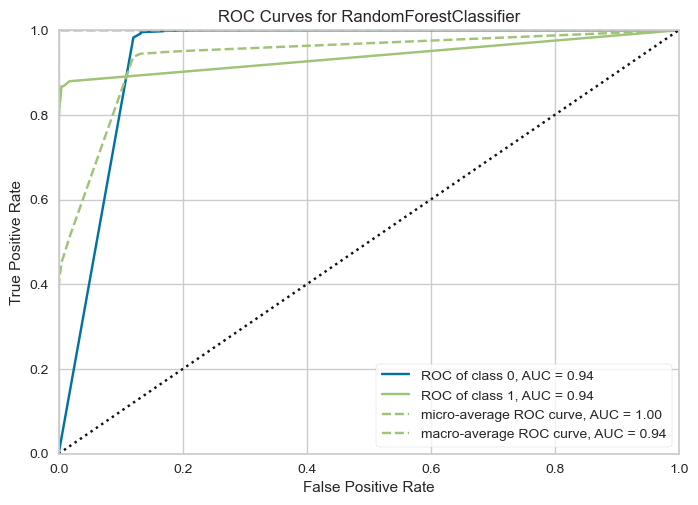

In [52]:
plot_model(best_baseline_model, plot='auc')

In [74]:
pred_df = predict_model(best_baseline_model, data=test_df.copy().drop('Class', axis=1))

In [83]:
pred_df[pred_df['prediction_label'] == 1]['prediction_label'].count()

48

In [84]:
test_df[test_df['Class'] == 1]['Class'].count()

77

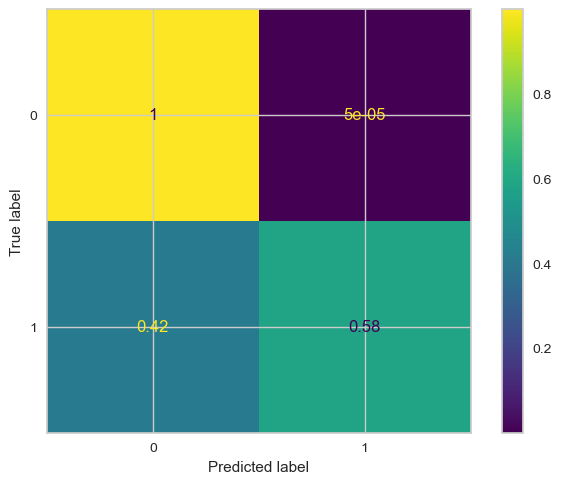

In [85]:
ConfusionMatrixDisplay.from_predictions(test_df['Class'], pred_df['prediction_label'], normalize="true")